In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [61]:
df_lip=pd.read_csv('prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqLIP"])
df_PS=pd.read_csv('prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPS"])
df_PC=pd.read_csv('prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPC"])

In [62]:
df_lip.head()

,res,contactfreqLIP
0,1885,0.02
1,1886,0.55
2,1887,0.80
3,1888,1.71
4,1889,0.08


In [63]:
result = df_lip.merge(df_PS,how='outer').merge(df_PC,how='outer').fillna(0)

In [64]:
print(result)

      res  contactfreqLIP  contactfreqPS  contactfreqPC
0    1885            0.02           0.00           0.02
1    1886            0.55           0.02           0.53
2    1887            0.80           0.00           0.80
3    1888            1.71           1.33           0.39
4    1889            0.08           0.00           0.08
..    ...             ...            ...            ...
155  2181           60.76          11.10          56.24
156  2182           95.55          11.61          93.76
157  2183           64.14           6.20          59.67
158  2184            0.04           0.04           0.00
159  2187           51.33          51.24           3.73

[160 rows x 4 columns]


In [65]:
#hist=result.hist()

Text(0, 0.5, 'contact freq')

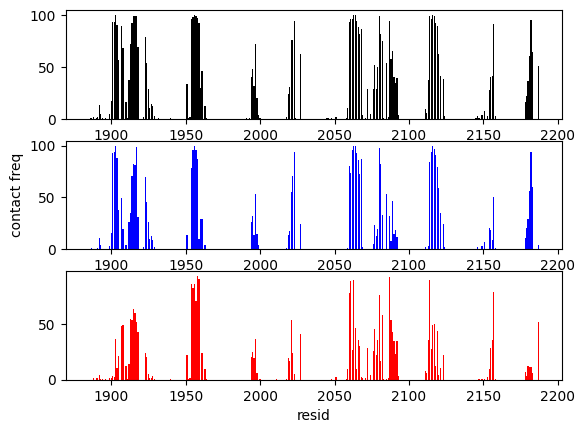

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.bar(result.res,result.contactfreqLIP,color='black')
ax2.bar(result.res,result.contactfreqPC,color='blue')
ax3.bar(result.res,result.contactfreqPS,color='red')
ax3.set_xlabel('resid')
ax2.set_ylabel('contact freq')

In [67]:
#fig.savefig("contactfreqfig.pdf")

In [68]:
df_LIP_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_LIP_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_LIP_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_LIP = df_LIP_repl1.merge(df_LIP_repl2,how='outer').merge(df_LIP_repl3,how='outer').fillna(0)

df_PC_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PC_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PC_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_PC = df_PC_repl1.merge(df_PC_repl2,how='outer').merge(df_PC_repl3,how='outer').fillna(0)

df_PS_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PS_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PS_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
result_PS = df_PS_repl1.merge(df_PS_repl2,how='outer').merge(df_PS_repl3,how='outer').fillna(0)

In [69]:
new_df_LIP = pd.DataFrame(data=[result_LIP.cf1,result_LIP.cf2,result_LIP.cf3])
new_df_PC = pd.DataFrame(data=[result_PC.cf1,result_PC.cf2,result_PC.cf3])
new_df_PS = pd.DataFrame(data=[result_PS.cf1,result_PS.cf2,result_PS.cf3])

In [70]:
new_df_LIP

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
cf1,0.02,0.55,0.80,1.71,0.08,1.10,2.00,13.49,4.18,0.53,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
cf2,0.00,0.98,1.02,0.86,0.04,0.14,3.43,18.53,14.80,2.96,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
cf3,0.00,6.63,0.55,0.06,0.00,0.00,0.04,2.08,0.20,0.02,...,0.24,0.86,0.84,0.02,0.39,0.84,0.2,0.02,0.02,0.14


In [71]:
new_df_LIP.mean()

0      0.006667
1      2.720000
2      0.790000
3      0.876667
4      0.040000
         ...   
229    0.280000
230    0.066667
231    0.006667
232    0.006667
233    0.046667
Length: 234, dtype: float64

In [72]:
print('ok')

ok


In [73]:
## fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.bar(result_LIP.res,new_df_LIP.mean(),color='black',label='all lipids (PC+PS)')
ax2.bar(result_PC.res,new_df_PC.mean(),color='blue',label='PC')
ax3.bar(result_PS.res,new_df_PS.mean(),color='red',label='PS')
ax3.set_xlabel('Residue')
ax2.set_ylabel('<Contact frequency> [%]')
ax1.set_xlim([1500,2200])
ax2.set_xlim([1500,2200])
ax3.set_xlim([1500,2200])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

#domain spec
ax1.plot([1550,1876],[110,110], 'g-', lw=5)
ax1.plot([1879,2033],[110,110], 'b-', lw=5)
ax1.plot([2038,2193],[110,110], 'r-', lw=5)
ax1.text(1800,120,'A3',c='green')
ax1.text(1950,120,'C1',c='blue')
ax1.text(2150,120,'C2',c='red')

Text(2150, 120, 'C2')

In [74]:
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq/contactfreq_avg_120.pdf")

In [75]:
cc_LIP=pd.concat([result_LIP,new_df_LIP.mean()],axis=1)
cc_PC=pd.concat([result_PC,new_df_PC.mean()],axis=1)
cc_PS=pd.concat([result_PS,new_df_PS.mean()],axis=1)

In [76]:
cc_LIP=cc_LIP.rename(columns = {0:'meanLIP'})
cc_PC=cc_PC.rename(columns = {0:'meanPC'})
cc_PS=cc_PS.rename(columns = {0:'meanPS'})

In [77]:
cc_LIP=cc_LIP.drop(['cf1','cf2','cf3'],axis=1)
cc_PC=cc_PC.drop(['cf1','cf2','cf3'],axis=1)
cc_PS=cc_PS.drop(['cf1','cf2','cf3'],axis=1)

In [78]:
comb=cc_LIP.merge(cc_PC,how='outer').merge(cc_PS,how='outer').fillna(0)

In [79]:
comb.head()

,res,meanLIP,meanPC,meanPS
0,1885,0.006667,0.006667,0.000000
1,1886,2.720000,0.366667,2.353333
2,1887,0.790000,0.443333,0.346667
3,1888,0.876667,0.266667,0.620000
4,1889,0.040000,0.033333,0.006667


(0.0, 100.0)

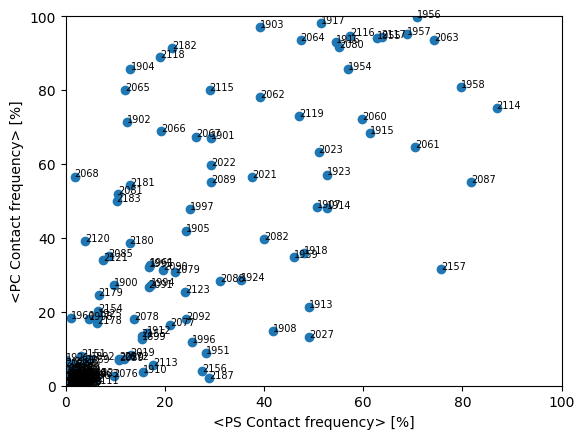

In [80]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC)
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)

for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)

ax.set_ylim([0,100])
ax.set_xlim([0,100])


In [81]:
comb

,res,meanLIP,meanPC,meanPS
0,1885,0.006667,0.006667,0.000000
1,1886,2.720000,0.366667,2.353333
2,1887,0.790000,0.443333,0.346667
3,1888,0.876667,0.266667,0.620000
4,1889,0.040000,0.033333,0.006667
...,...,...,...,...
229,2049,0.280000,0.273333,0.006667
230,2055,0.066667,0.046667,0.020000
231,2070,0.006667,0.000000,0.006667
232,2096,0.006667,0.006667,0.000000


In [82]:
col=np.multiply( np.sin(math.pi/4 - np.arctan(comb.meanPC/comb.meanPS)), np.sqrt(comb.meanPC*comb.meanPC+comb.meanPS*comb.meanPS))

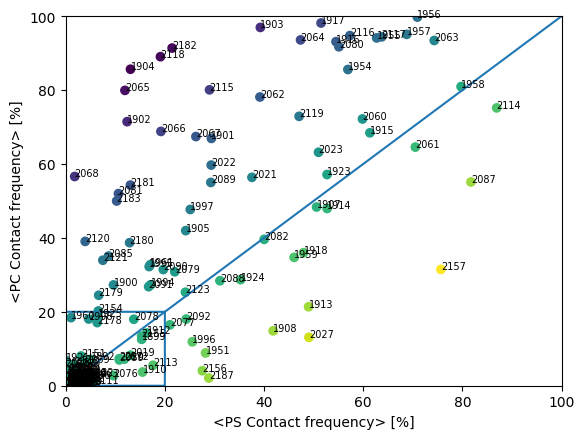

In [83]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.plot([0,20,20,0,0,100],[0,0,20,20,0,100])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    
ax.set_ylim([0,100])
ax.set_xlim([0,100])
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_120.pdf')

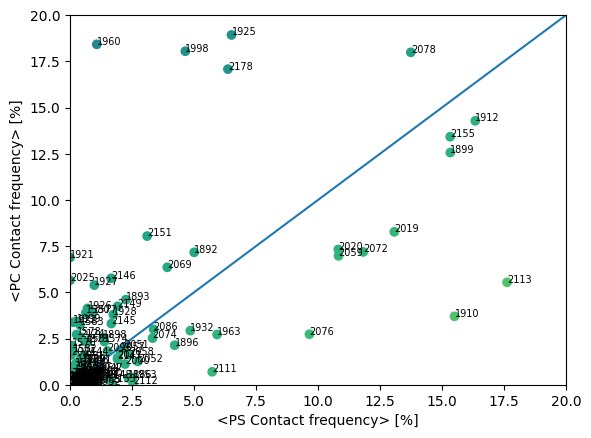

In [84]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.set_ylim([0,20])
ax.set_xlim([0,20])
ax.plot([0,20],[0,20])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_20_120.pdf')

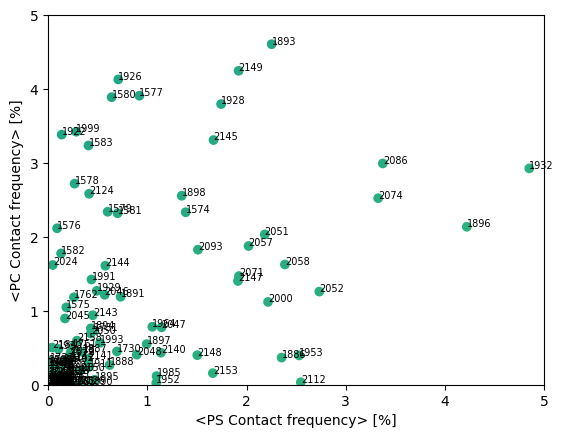

In [85]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')
ax.set_ylim([0,5])
ax.set_xlim([0,5])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_5_120.pdf')